# Water Quality Parameters - Statistics - Example

This notebook aims at computing the descriptive statistics for the WQP maps, or any raster, by defining specific features from which these statistics are requested. In addition, the analysis of the WQP maps will consider de extraction of sampling data inside the pixels to review the estimates.

In [3]:
# Styling notebook
%matplotlib notebook
# System
import os
import sys

# Import scripts libraries for the project
sys.path.append('./src/python')

# Import the function to update the notebook style
from nbConfig import (css_styling)

css_styling()

Import the libraries needed for the analysis

In [4]:
# Data
import numpy as np
import pandas as pd

# Spatial Data
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats

# Data visualization
import matplotlib.pyplot as plt
from rasterio.plot import show_hist

# Import custom libraries
import wqpFunctions as wqp

Define the working directory for the WQP processing

In [5]:
# Current Working Directories
cwd = {
    'local': '.',
    'in': '.\\in',
    'out': '.\\out',
    'vector': '.\\vector',
}

## 1. Lakes sampling points

Import the vector files for data extraction of the WQP maps

In [6]:
# Layer dataset
gdf_lakes = gpd.read_file(os.path.join(cwd['vector'],'simile_laghi','simile_laghi.shp'))
# Bboxes dataset
gdf_lakes_bboxes = gpd.read_file(os.path.join(cwd['vector'],'simile_laghi_bboxes','simile_laghi_bboxes.shp'))
# Buoy position in the lake
gdf_buoy = gpd.read_file(os.path.join(cwd['vector'],'boa_sample_points','boa_sample_points.shp'))
# Random sampling points
gdf_sample = gpd.read_file(os.path.join(cwd['vector'],'random_points','random_points.shp'))

<IPython.core.display.Javascript object>


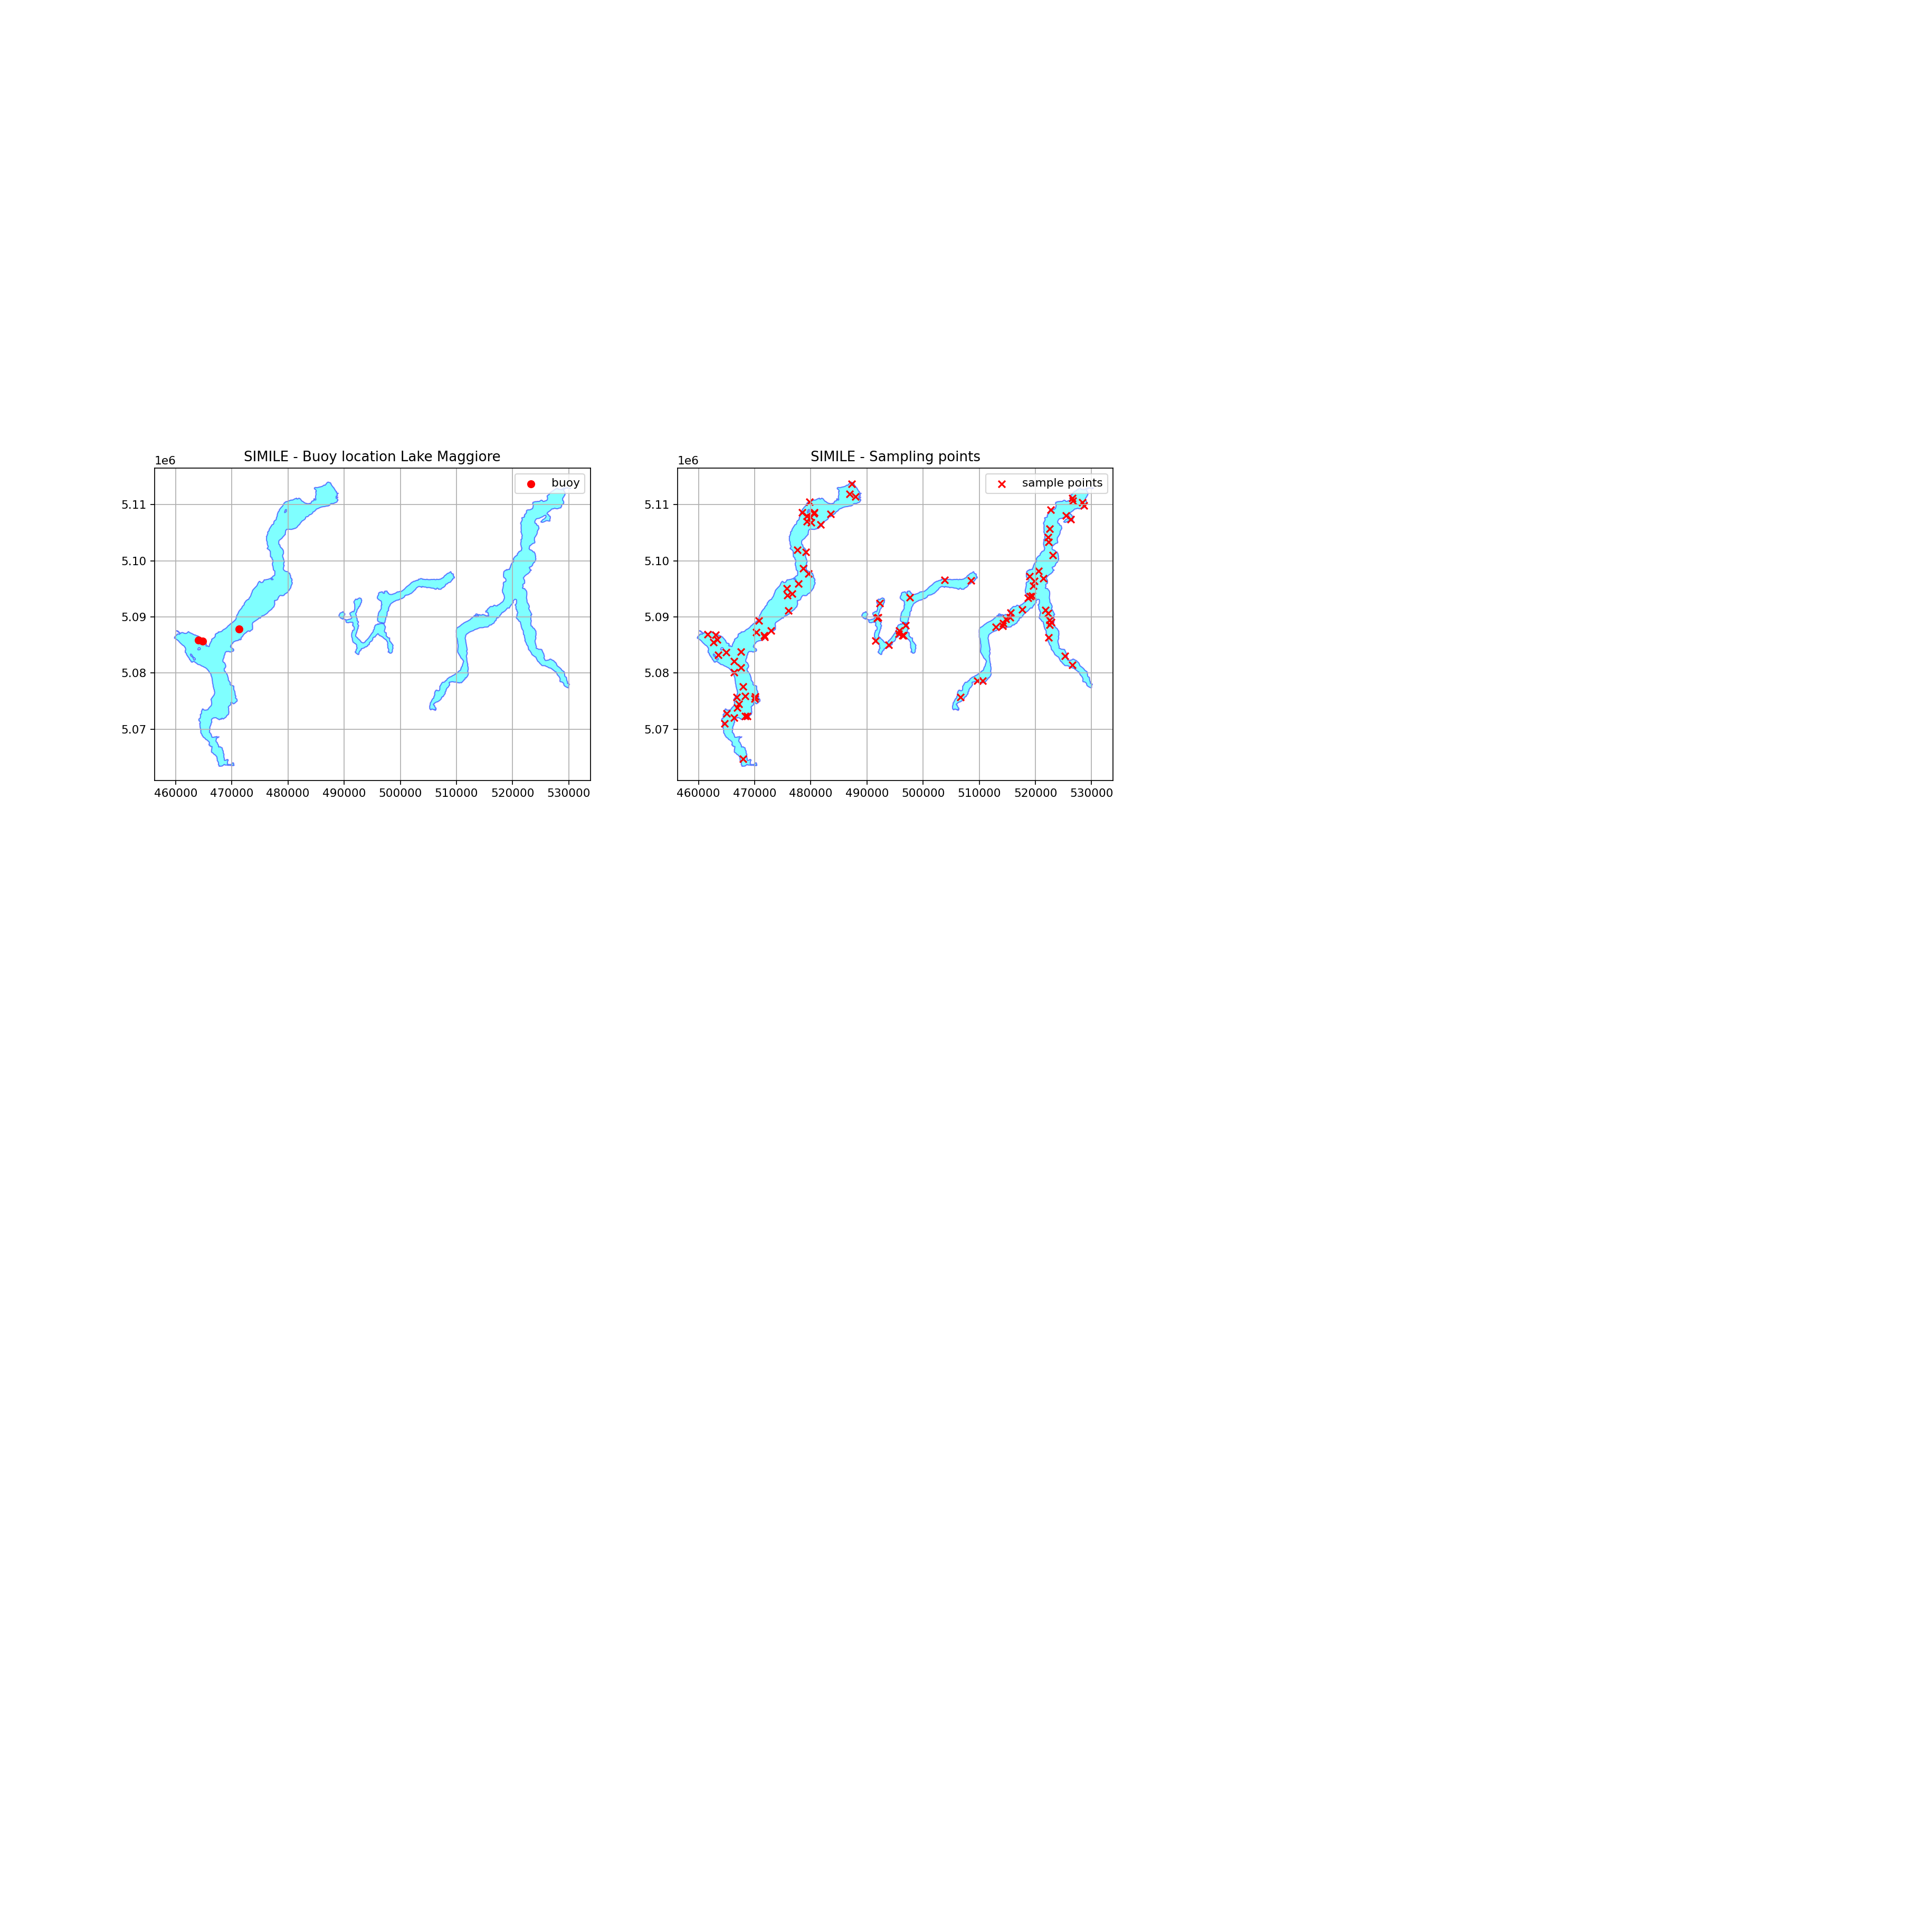

In [7]:
# Data Visualization of the lakes and buoy

# Plot settings
f, axs = plt.subplots(1, 2, figsize=(15,15))

# Sampling buoy
gdf_lakes.plot(ax=axs[0],color='cyan', edgecolor='blue', alpha=0.5)
gdf_buoy.plot(ax=axs[0], label='buoy', marker='o', color='red')
axs[0].set_title('SIMILE - Buoy location Lake Maggiore')
axs[0].legend()
axs[0].grid()

# Random sampling points
gdf_lakes.plot(ax=axs[1],color='cyan', edgecolor='blue', alpha=0.5)
gdf_sample.plot(ax=axs[1], label='sample points', marker ='x', color='red')
axs[1].set_title('SIMILE - Sampling points')
axs[1].legend()
axs[1].grid()

## 2. WQP Map example

Read a WQP map and take advantage of the wqp library functions

In [8]:
#Import the sample dataset
src = wqp.wqp('.\\in\\data\\wqp\\S3\\wqp_no_clip\\chl\\S3A_CHL_IT_20190215T100832_L1.tif')
src.readWQP()

Use the attributes and methods for the [rasterio](https://rasterio.readthedocs.io/en/latest/) objects.

In [9]:
src.image.read(1)

array([[0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833],
       [0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833],
       [0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833],
       ...,
       [0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833],
       [0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833],
       [0.45265833, 0.45265833, 0.45265833, ..., 0.45265833, 0.45265833,
        0.45265833]], dtype=float32)

In [10]:
src.image.crs

CRS.from_epsg(32632)

In [11]:
src.image.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 759, 'height': 646, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(300.0, 0.0, 374999.7099864398,
       0.0, -300.0, 5166953.115132323), 'tiled': False, 'interleave': 'band'}

<IPython.core.display.Javascript object>


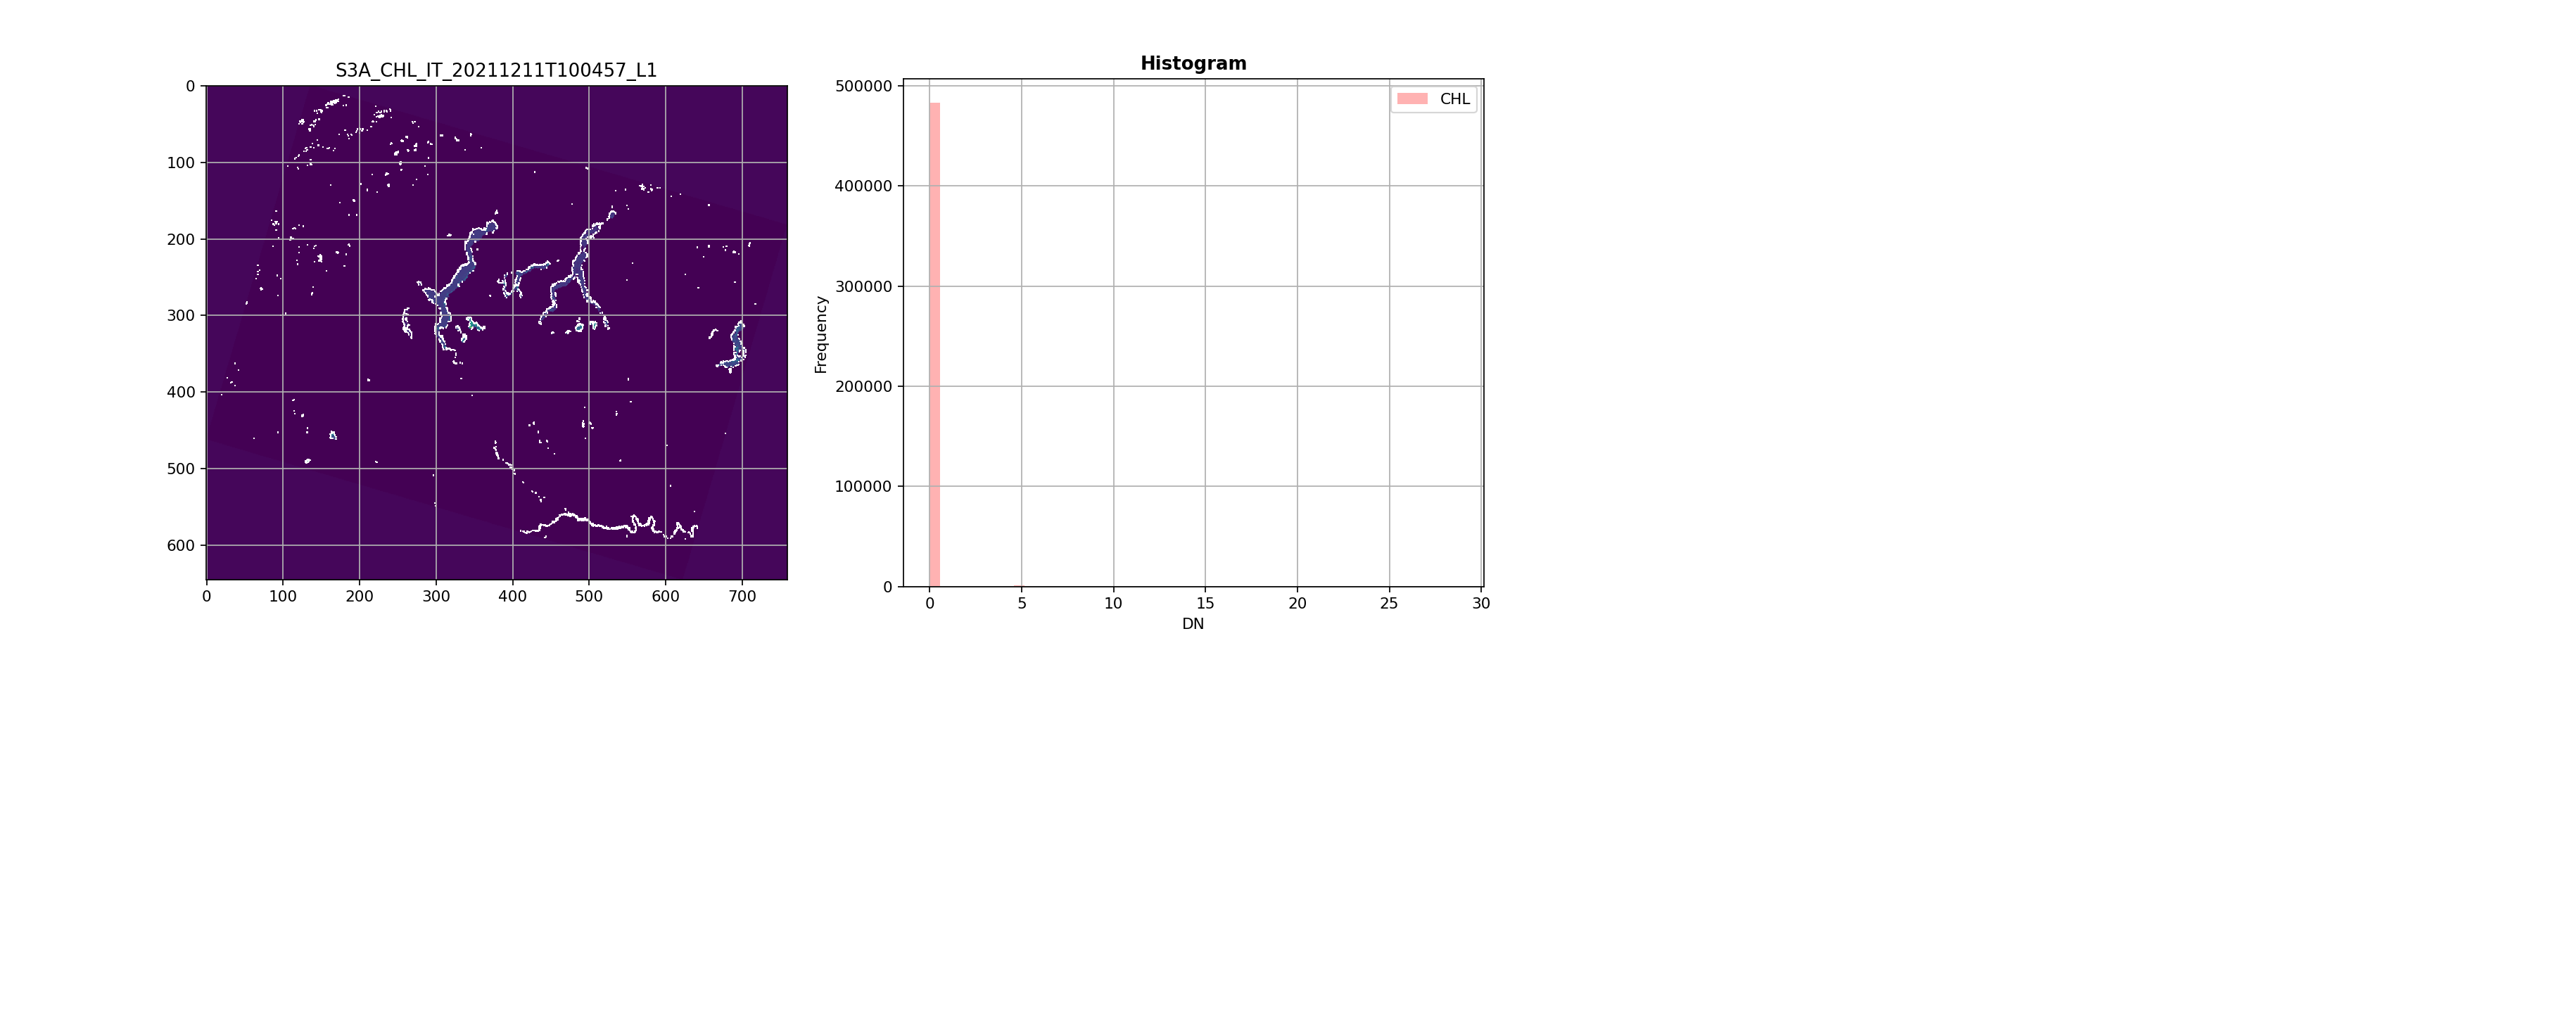

In [12]:
# Data visualization of sample WQP
f, axs = plt.subplots(1, 2, figsize=(15,6))

#PLot WQP
axs[0].imshow(src.image.read(1), cmap='viridis')
axs[0].grid()
axs[0].set_title('S3A_CHL_IT_20211211T100457_L1')

#Histogram of values for the bands in the WQP map (single-band)
axs[1] = show_hist(
    src.image, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram", label='CHL')

Compute the descriptive statistics using the [rasterstats](https://pythonhosted.org/rasterstats/) library. Update the wqp object computing the statistics using reference polygon features within the image.

### 2.1. Descriptive statistics - polygons

In [13]:
src.computeStatistics(gdf_lakes, 'Nome',"count min mean max median std  percentile_25 percentile_50 percentile_75",0)

Present the contents for the example raster layer

In [14]:
src.__dict__

{'path': '.\\in\\data\\wqp\\S3\\wqp_no_clip\\chl\\S3A_CHL_IT_20190215T100832_L1.tif',
 'name': 'S3A_CHL_IT_20190215T100832_L1',
 'sensor': 'S3A',
 'typology': 'CHL',
 'crs': 'IT',
 'date': datetime.datetime(2019, 2, 15, 10, 8, 32),
 'image': <open DatasetReader name='.\in\data\wqp\S3\wqp_no_clip\chl\S3A_CHL_IT_20190215T100832_L1.tif' mode='r'>,
 'stats': {'Maggiore': {'min': 0.2771259546279907,
   'max': 28.725387573242188,
   'mean': 5.227165112953732,
   'count': 1956,
   'std': 1.5050360055373075,
   'median': 5.104102611541748,
   'percentile_25': 4.921688795089722,
   'percentile_50': 5.104102611541748,
   'percentile_75': 5.242051362991333},
  'Como': {'min': 0.40322956442832947,
   'max': 13.707666397094727,
   'mean': 4.223235769868369,
   'count': 1263,
   'std': 1.4150090200938226,
   'median': 4.564000606536865,
   'percentile_25': 3.8258838653564453,
   'percentile_50': 4.564000606536865,
   'percentile_75': 4.867486953735352},
  'Lugano': {'min': 0.5760292410850525,
   'ma

### 2.2. Extract sample points

Extract information of the raster dataset using sampling points for the first band of a raster.

In [15]:
gdf_sample.head()

,fid,id,geometry
0,1.0,0,POINT (497652.353 5093506.819)
1,2.0,1,POINT (522545.439 5088579.415)
2,3.0,2,POINT (467520.010 5080956.243)
3,4.0,3,POINT (467932.633 5064720.093)
4,5.0,4,POINT (491544.431 5085740.736)


In [16]:
src.extractSamplePoints(gdf_sample[0:5])

In [17]:
src.samplePoint

,id,x,y,row,col,CHL
0,1.0,497652.353120,5.093507e+06,244,408,5.214189
1,2.0,522545.438963,5.088579e+06,261,491,4.633028
2,3.0,467520.010459,5.080956e+06,286,308,5.143062
3,4.0,467932.633429,5.064720e+06,340,309,5.188357
4,5.0,491544.431452,5.085741e+06,270,388,4.891826


### 2.3. Create a new dataset

In [18]:
t = src.image.read(1)
t[t<=0] = np.nan

In [19]:
os.path.join(cwd['out'],'nanImages')
src.typology

'CHL'

In [20]:
src.writeWQP(os.path.join(cwd['out'],'nanImages',src.name+'.tif'),t)

### 2.4. Export statistics

Create, or update, a dataset containing the information about the statistics of the processed wqp maps.

In [21]:
src.stats

{'Maggiore': {'min': 0.2771259546279907,
  'max': 28.725387573242188,
  'mean': 5.227165112953732,
  'count': 1956,
  'std': 1.5050360055373075,
  'median': 5.104102611541748,
  'percentile_25': 4.921688795089722,
  'percentile_50': 5.104102611541748,
  'percentile_75': 5.242051362991333},
 'Como': {'min': 0.40322956442832947,
  'max': 13.707666397094727,
  'mean': 4.223235769868369,
  'count': 1263,
  'std': 1.4150090200938226,
  'median': 4.564000606536865,
  'percentile_25': 3.8258838653564453,
  'percentile_50': 4.564000606536865,
  'percentile_75': 4.867486953735352},
 'Lugano': {'min': 0.5760292410850525,
  'max': 19.96996307373047,
  'mean': 5.784751913950573,
  'count': 349,
  'std': 2.6132183109518383,
  'median': 5.25392484664917,
  'percentile_25': 4.9004435539245605,
  'percentile_50': 5.25392484664917,
  'percentile_75': 6.295909881591797}}

In [22]:
# New dictionary for the dataset to become a DataFrame
df_temp = pd.DataFrame(src.stats)
df_temp.head()

,Maggiore,Como,Lugano
min,0.277126,0.403230,0.576029
max,28.725388,13.707666,19.969963
mean,5.227165,4.223236,5.784752
count,1956.000000,1263.000000,349.000000
std,1.505036,1.415009,2.613218


In [23]:
df = wqp.wqp.exportWQPFormatEstimates(src)

In [24]:
df

,name,path,sensor,typology,crs,date,min_Maggiore,max_Maggiore,mean_Maggiore,count_Maggiore,...,percentile_75_Como,min_Lugano,max_Lugano,mean_Lugano,count_Lugano,std_Lugano,median_Lugano,percentile_25_Lugano,percentile_50_Lugano,percentile_75_Lugano
0,S3A_CHL_IT_20190215T100832_L1,.\in\data\wqp\S3\wqp_no_clip\chl\S3A_CHL_IT_20...,S3A,CHL,IT,2019-02-15 10:08:32,0.277126,28.725388,5.227165,1956,...,4.867487,0.576029,19.969963,5.784752,349,2.613218,5.253925,4.900444,5.253925,6.29591


In [25]:
# Export the statistics result to a file (append data if existing)
# out_file = os.path.join(cwd['out'],'lakesStats','lakesStats.csv')
# if os.path.exists(out_file):
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv'),mode='a', header=False)
# else:
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv')) 

### 2.6. Outlier Rejection Methods

The wqp libray allows to apply the outlier rejection methods within specified features. Next we will extract the cropped rasters for the analysis.

In [26]:
p = os.path.join(cwd['vector'],'simile_laghi','simile_laghi.shp')
src.cropRasterByFeatures(p, 'Nome')

A dictionary will be generated with the correponding subset and transform for the corresponding bounding feature applied

In [27]:
src.crops

{'Maggiore': {'crop': array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 459599.7099864398,
         0.0, -300.0, 5114153.115132323)},
 'Como': {'crop': array([[[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          ...,
          [       nan, 0.99376637, 2.503009  , ...,        nan,
                  nan,        nan],
          [       nan,        nan, 4.439342  , ...,        nan,
                  nan,        nan],
          [       nan,        nan,    

Once that the subsets are available, is is possible to apply the independent outlier rejection methods of interest

[IQR](https://it.wikipedia.org/wiki/Scarto_interquartile) (Inter Quantile Range method)

<div style="display:inline-flex">
    <div style="width:50%">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png">
    </div>
    <div>
        <p>
            Here is possible to find the implementation for the IQR method for outlier detection and rejection.
        </p>
    </div>
</div>

In [28]:
src.outlierRejection(minLower=0)

{'Maggiore': {'Method': None,
  'lowerBound': 4.441144943237305,
  'upperBound': 5.72259521484375,
  'countLower': 200,
  'countUpper': 230,
  'countTotal': 10224.335,
  'percValid': 0.7576026,
  'percOutliers': 0.24239742755889893},
 'Como': {'Method': None,
  'lowerBound': 2.263479232788086,
  'upperBound': 6.429891586303711,
  'countLower': 149,
  'countUpper': 37,
  'countTotal': 5333.947,
  'percValid': 0.90679485,
  'percOutliers': 0.09320515394210815},
 'Lugano': {'Method': None,
  'lowerBound': 2.807244062423706,
  'upperBound': 8.389109373092651,
  'countLower': 29,
  'countUpper': 41,
  'countTotal': 2018.8784,
  'percValid': 0.74275935,
  'percOutliers': 0.2572406530380249}}

Two Sigma

In [29]:
src.crops

{'Maggiore': {'crop': array([[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32),
  'transform': Affine(300.0, 0.0, 459599.7099864398,
         0.0, -300.0, 5114153.115132323)},
 'Como': {'crop': array([[[     nan,      nan,      nan, ...,      nan,      nan,
                nan],
          [     nan,      nan,      nan, ...,      nan,      nan,
                nan],
          [     nan,      nan,      nan, ...,      nan,      nan,
                nan],
          ...,
          [     nan,      nan, 2.503009, ...,      nan,      nan,
                nan],
          [     nan,      nan, 4.439342, ...,      nan,      nan,
                nan],
          [     nan,      nan,      nan, ...,      nan,      nan,
                nan]]], dtype=fl

Three Sigma

## 3. Image Coregistration tests

### 3.0. Prepare Images - subset

First, it is required to guarantee that the input products (slave & master products) for the coregistration have the same shape. For this, a preliminar subset of the bands of interes for the S products is performed

Crop the raster layer to the extent the extent of the lakes features (with an offset of 600m). The offset aims to guarantee that the shift of the images do not end-up in removing estimates of the WQP.

Here we present an example for cropping one of the WQP maps.

<p class="important"><strong>Note: </strong>For the coregistration procedure, it must be ensured that the images have the same shape. For this reason, the masking algorithm account for all pixels intersected by the features.</p>

In [30]:
# Set the paths to the slave and master poducts
master_name = 'S3A_IT_20190315T094218_L1'
slave_name = 'S3B_IT_20210422T100637_L1'
slave_name_wqp = 'S3B_CHL_IT_20210422T100637_L1'

oa_bands_slave =  './in/data/wqp/S3/oa\\'+slave_name+'.tif'
oa_bands_master =  './in/data/wqp/S3/oa\\'+master_name+'.tif'

# Read the slave and master products
slave = wqp.wqp(oa_bands_slave)
slave.readWQP()
master = wqp.wqp(oa_bands_master)
master.readWQP()

In [31]:
slave.image.crs

CRS.from_epsg(32632)

In [35]:
# Masking the WQP maps
featureGeometry = './vector/simile_laghi_extent/simile_laghi_extent_600m_buff.shp'
master.cropRasterByFeatures(featureGeometry,'Nome')
slave.cropRasterByFeatures(featureGeometry,'Nome')

In [36]:
master.crops['wqp']['crop'].shape

(21, 175, 242)

In [37]:
slave.crops['wqp']['crop'].shape

(21, 176, 242)

In [38]:
out_path_master = './out/Coregistration/master/oa_18/full'
out_path_slave = './out/Coregistration/slave/oa_18/full'

master.saveMaskedImage(os.path.join(out_path_master,master.name+'_Oa_18.tif'),'wqp',band=18)
slave.saveMaskedImage(os.path.join(out_path_slave,slave.name+'_Oa_18.tif'),'wqp',band=18)

<p class="important"><strong>Note:</strong> Computation of the slope for the reference bands<p>
    

In [39]:
import richdem as rd

In [40]:
os.path.join(out_path_master,master.name+'_Oa_18.tif')

'./out/Coregistration/master/oa_18/full\\S3A_IT_20190315T094218_L1_Oa_18.tif'

In [41]:
rd_master = rd.LoadGDAL(os.path.join(out_path_master,master.name+'_Oa_18.tif'), no_data=0)
rd_slave = rd.LoadGDAL(os.path.join(out_path_slave,slave.name+'_Oa_18.tif'), no_data=0)

In [42]:
slope_master = rd.TerrainAttribute(rd_master, attrib='slope_riserun')
slope_slave = rd.TerrainAttribute(rd_slave, attrib='slope_riserun')

In [43]:
out_path_master = './out/Coregistration/master/slope_oa_18/full'
out_path_slave = './out/Coregistration/slave/slope_oa_18/full'
# Save the slope for the master data
rd.SaveGDAL(os.path.join(out_path_master,master.name+'_Oa_18.tif'), slope_master)
# Save the slope for the slave data
rd.SaveGDAL(os.path.join(out_path_slave,slave.name+'_Oa_18.tif'), slope_slave)

RuntimeError: Deleting ./out/Coregistration/master/slope_oa_18/full\S3A_IT_20190315T094218_L1_Oa_18.tif failed:
Permission denied

The image corregistration is executed using [GeFolki](https://github.com/aplyer/gefolki.git).

Sample images cropped for corregistration

### Open parenthesis

The coregistration procedure will be applied per lake. For this reason, it is necessary creating an intermediate outputs for both, reference band and wqp map.

Load both slope and wqp files.

In [39]:
list(gdf_lakes_bboxes.Nome)

['Maggiore', 'Como', 'Lugano']

In [40]:
# Crop the rasters using the lakes shapes
p = os.path.join(cwd['vector'],'simile_laghi_bboxes','simile_laghi_bboxes.shp')

In [41]:
os.path.join(cwd['in'],'data\\wqp\\S3\\wqp_no_clip\\chl\\S3A_CHL_IT_20190315T094218_L1.tif')

'.\\in\\data\\wqp\\S3\\wqp_no_clip\\chl\\S3A_CHL_IT_20190315T094218_L1.tif'

Crop and save wqp

In [42]:
wqp_map = wqp.wqp(os.path.join(cwd['in'],'data\\wqp\\S3\\wqp_no_clip\\chl\\'+slave_name_wqp+'.tif'))
wqp_map.readWQP()
wqp_map.cropRasterByFeatures(p, 'Nome')

In [43]:
for nameFeature in list(gdf_lakes_bboxes.Nome):
    out_path = os.path.join(cwd['out'],'Coregistration\\wqp\\S3\\partial\\chl\\{}\\{}'.format(nameFeature,slave_name_wqp+'.tif'))
    print(out_path)
    wqp_map.saveMaskedImage(out_path,nameFeature, band=1)

.\out\Coregistration\wqp\S3\partial\chl\Maggiore\S3B_CHL_IT_20210422T100637_L1.tif
.\out\Coregistration\wqp\S3\partial\chl\Como\S3B_CHL_IT_20210422T100637_L1.tif
.\out\Coregistration\wqp\S3\partial\chl\Lugano\S3B_CHL_IT_20210422T100637_L1.tif


Crop and save slope master

In [44]:
slope_master = wqp.wqp(os.path.join(cwd['out'],'Coregistration\master\slope_oa_18\\full\\'+master_name+'_Oa_18.tif'))
slope_master.readWQP()
slope_master.cropRasterByFeatures(p, 'Nome')
for nameFeature in list(gdf_lakes_bboxes.Nome):
    out_path = os.path.join(cwd['out'],'Coregistration\master\slope_oa_18\\partial\\{}\\{}'.format(nameFeature,master_name+'_Oa_18.tif'))
    print(out_path) 
    slope_master.saveMaskedImage(out_path,nameFeature, band=1)
slope_master.__dict__

.\out\Coregistration\master\slope_oa_18\partial\Maggiore\S3A_IT_20190315T094218_L1_Oa_18.tif
.\out\Coregistration\master\slope_oa_18\partial\Como\S3A_IT_20190315T094218_L1_Oa_18.tif
.\out\Coregistration\master\slope_oa_18\partial\Lugano\S3A_IT_20190315T094218_L1_Oa_18.tif


{'path': '.\\out\\Coregistration\\master\\slope_oa_18\\full\\S3A_IT_20190315T094218_L1_Oa_18.tif',
 'name': 'S3A_IT_20190315T094218_L1_Oa_18',
 'sensor': 'S3A',
 'typology': 'IT',
 'crs': '20190315T094218',
 'date': datetime.datetime(2019, 3, 15, 9, 42, 18),
 'image': <open DatasetReader name='.\out\Coregistration\master\slope_oa_18\full\S3A_IT_20190315T094218_L1_Oa_18.tif' mode='r'>,
 'crops': {'Maggiore': {'crop': array([[[       nan, 0.05429068, 0.07081395, ..., 0.01966191,
            0.00378954, 0.00737643],
           [       nan, 0.03086023, 0.08028445, ..., 0.0488001 ,
            0.01824647, 0.01447732],
           [       nan, 0.05967027, 0.02663389, ..., 0.08868735,
            0.0366156 , 0.02994624],
           ...,
           [       nan, 0.00839529, 0.002789  , ..., 0.03260788,
            0.00561804, 0.00754306],
           [       nan, 0.00778536, 0.00801365, ..., 0.03283359,
            0.00618392, 0.0188276 ],
           [       nan, 0.01569576, 0.0068351 , ..., 0.02

Crop and save slope slave

In [45]:
slope_slave = wqp.wqp(os.path.join(cwd['out'],'Coregistration\slave\slope_oa_18\\full\\'+slave_name+'_Oa_18.tif'))
slope_slave.readWQP()
slope_slave.cropRasterByFeatures(p, 'Nome')
for nameFeature in list(gdf_lakes_bboxes.Nome):
    out_path = os.path.join(cwd['out'],'Coregistration\slave\slope_oa_18\\partial\\{}\\{}'.format(nameFeature,slave_name+'_Oa_18.tif'))
    print(out_path)
    slope_slave.saveMaskedImage(out_path,nameFeature, band=1)

.\out\Coregistration\slave\slope_oa_18\partial\Maggiore\S3B_IT_20210422T100637_L1_Oa_18.tif
.\out\Coregistration\slave\slope_oa_18\partial\Como\S3B_IT_20210422T100637_L1_Oa_18.tif
.\out\Coregistration\slave\slope_oa_18\partial\Lugano\S3B_IT_20210422T100637_L1_Oa_18.tif


### Close parenthesis

### 3.1. Sample datasets for the coregistration

Master band - S3A_IT_20190315T094218_L1_Oa_18



<IPython.core.display.Javascript object>


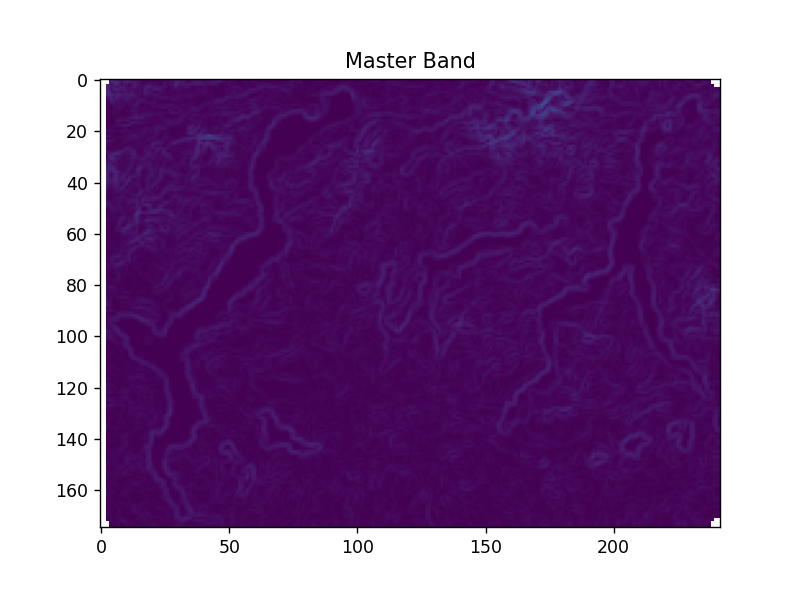

Slave band - S3B_IT_20200707T095909_L1_Oa_18



<IPython.core.display.Javascript object>


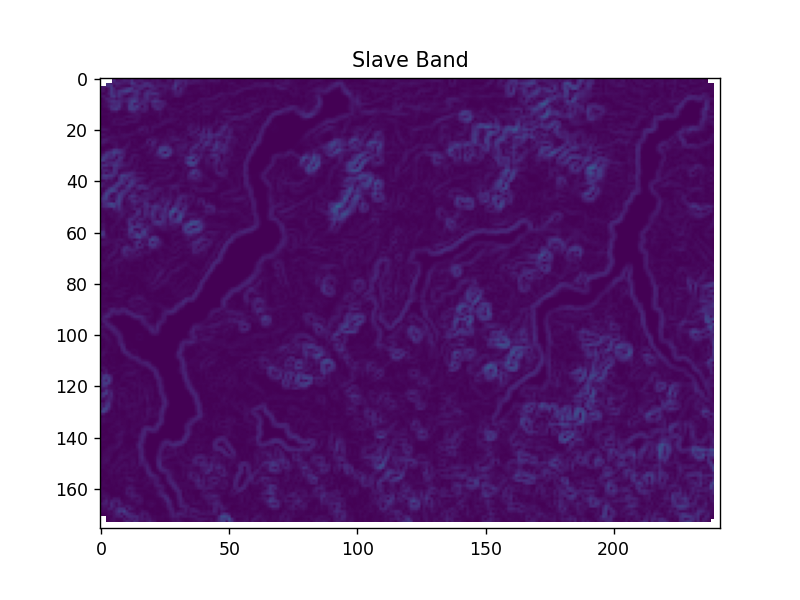

Text(0.5, 1.0, 'Slave Band')

In [46]:
import numpy as np
from skimage.io import imread
import pylab as pl

print("Master band - S3A_IT_20190315T094218_L1_Oa_18\n")
master_im = imread(os.path.join(out_path_master,master.name+'_Oa_18.tif'))
pl.figure()
pl.imshow(master_im,vmin=0,vmax=1,cmap='viridis')
pl.title('Master Band')

  
print("Slave band - S3B_IT_20200707T095909_L1_Oa_18\n")
slave_im = imread(os.path.join(out_path_slave,slave.name+'_Oa_18.tif'))
pl.figure()
pl.imshow(slave_im,vmin=0,vmax=1,cmap='viridis')
pl.title('Slave Band')

### 3.2. Flow Computation

In [47]:
sys.path.append('./src/python/gefolki/python')
from algorithm import EFolki
from tools import wrapData

Apply the flow computation to each of the lakes

In [48]:
master.name

'S3A_IT_20190315T094218_L1'

In [49]:
in_path_master = './out/Coregistration/master/slope_oa_18/partial'
in_path_slave = './out/Coregistration/slave/slope_oa_18/partial'
in_path_wqp = './out/Coregistration/wqp/S3/partial/chl'
out_path_wqp = './out/Coregistration/wqp/S3/partial_coregistered/chl'

raster_collection = dict()
for nameFeature in list(gdf_lakes_bboxes.Nome):
    # Determine the paths to the partial rasters (crop per lake)
    master_path = os.path.join(in_path_master,nameFeature,master.name+'_Oa_18.tif')
    slave_path = os.path.join(in_path_slave,nameFeature,slave.name+'_Oa_18.tif')
    wqp_path = os.path.join(in_path_wqp,nameFeature,slave_name_wqp+'.tif')
    
    # Read the images
    master_im = imread(master_path)
    slave_im = imread(slave_path)
    wqp_map = imread(wqp_path)
    # Read shape of the maser raster (fix width and height of the rasters for the coregistered images following the reference band)
    master_width = master_im.shape[0]
    master_height = master_im.shape[1]
    # Remove the nan values (GeFolki processing requirement)
    master_im = master_im.astype(np.float32)
    slave_im = slave_im.astype(np.float32)
    wqp_map = wqp_map.astype(np.float32)
    master_im = np.nan_to_num(master_im[:master_width-1,:master_height-1], copy=True, nan=0.0, posinf=None, neginf=None)
    slave_im = np.nan_to_num(slave_im[:master_width-1,:master_height-1], copy=True, nan=0.0, posinf=None, neginf=None)
   
    # Flow computation
    u, v = EFolki(master_im, slave_im, iteration=4, radius=[32,28,20,16,8], rank=4, levels=2)
    
    print(master_im.shape)
    print(slave_im.shape)
    
    # Resampling and final result
    WQPrecalee = wrapData(wqp_map[:master_width-1,:master_height-1], u, v)
    
    # Export partial datasets
    # Import the sample dataset master - Reference coregistration band
    src_master = wqp.wqp(master_path)
    src_master.readWQP()
    # Save the coregistered WQP map
    src_master.writeWQP(os.path.join(out_path_wqp,nameFeature,wqp_path.split('\\')[-1]),WQPrecalee)    
    
    # Merge data
    raster_collection[nameFeature] = src_master.create_dataset(WQPrecalee,src_master.image.profile['transform'])
    

(168, 97)
(168, 97)
(132, 83)
(132, 83)
(49, 68)
(49, 68)


In [50]:
raster_collection

{'Maggiore': <open DatasetWriter name='/vsimem/c110e354-7cf7-4a7e-b970-ecd45265ab97/c110e354-7cf7-4a7e-b970-ecd45265ab97.tif' mode='w+'>,
 'Como': <open DatasetWriter name='/vsimem/20f20935-1f03-451c-8fbb-b008b68281db/20f20935-1f03-451c-8fbb-b008b68281db.tif' mode='w+'>,
 'Lugano': <open DatasetWriter name='/vsimem/8407cd2f-a3ef-4ff2-afee-55f26f3634a7/8407cd2f-a3ef-4ff2-afee-55f26f3634a7.tif' mode='w+'>}

In [51]:
def saveMaskedImage(out_path,in_file,data,transf):
    with rasterio.open(in_file) as src:
        profile = src.profile.copy()
        profile.update({
                'dtype': 'float32',
                'height': data.shape[0],
                'width': data.shape[1],
                'transform': transf
         })  

    with rasterio.open(out_path, 'w', **profile) as dst:
        data[data<=0] = np.nan
        dst.write_band(1, data)

In [52]:
out_path = '.\out\Coregistration\wqp\S3\\full\chl'

os.path.join(out_path),os.path.join(in_path_master,nameFeature,master_name+'_Oa_18.tif')
# wqp_map = wqp.wqp(os.path.join(cwd['in'],'data\\wqp\\S3\\wqp_no_clip\\chl\\S3A_CHL_IT_20190215T100832_L1.tif'))
# wqp_map.readWQP()
# wqp_map.__dict__
# os.path.join(out_path,slave.name)

('.\\out\\Coregistration\\wqp\\S3\\full\\chl',
 './out/Coregistration/master/slope_oa_18/partial\\Lugano\\S3A_IT_20190315T094218_L1_Oa_18.tif')

In [1]:
from rasterio.merge import merge
out_path = '.\out\Coregistration\wqp\S3\\full\chl'
wqp_map = wqp.wqp(os.path.join('.\out\Coregistration\master\slope_oa_18\\full',master_name+'_Oa_18.tif'))
wqp_map.readWQP()

if (len(raster_collection)>0):
    raster_col_lst = []
    for x in ['Lugano','Como','Maggiore']:
        if x in list(raster_collection.keys()):
            raster_col_lst.append(raster_collection[x])
    merged, transf = merge(raster_col_lst)
    merged[0][merged[0]<=0]=0
    saveMaskedImage(os.path.join(out_path,slave_name_wqp+'.tif'),wqp_map.path,merged[0],transf)

NameError: name 'wqp' is not defined

### 3.3. Resampling and final result visualization

Apply flow computation to the coregistered image

In [54]:
from tools import wrapData

In [55]:
slaveRecalee = wrapData(slave_im, u, v)

Coregistered image

<IPython.core.display.Javascript object>


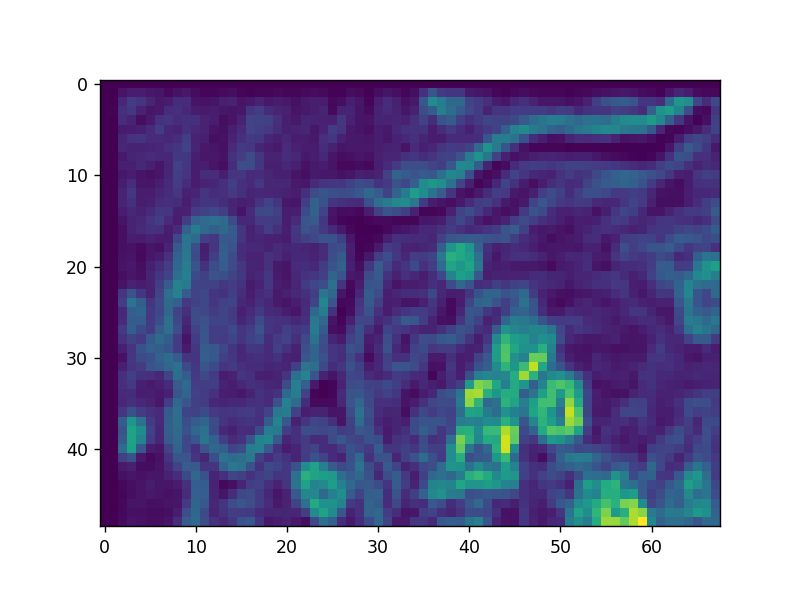

In [56]:
pl.figure()
pl.imshow(slaveRecalee)

Comparison of the results before and after coregistration

<IPython.core.display.Javascript object>


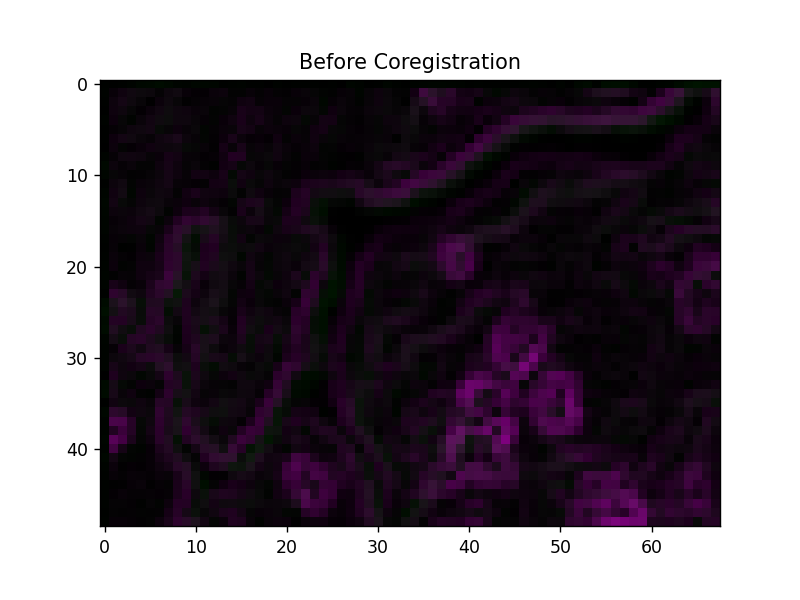

<IPython.core.display.Javascript object>


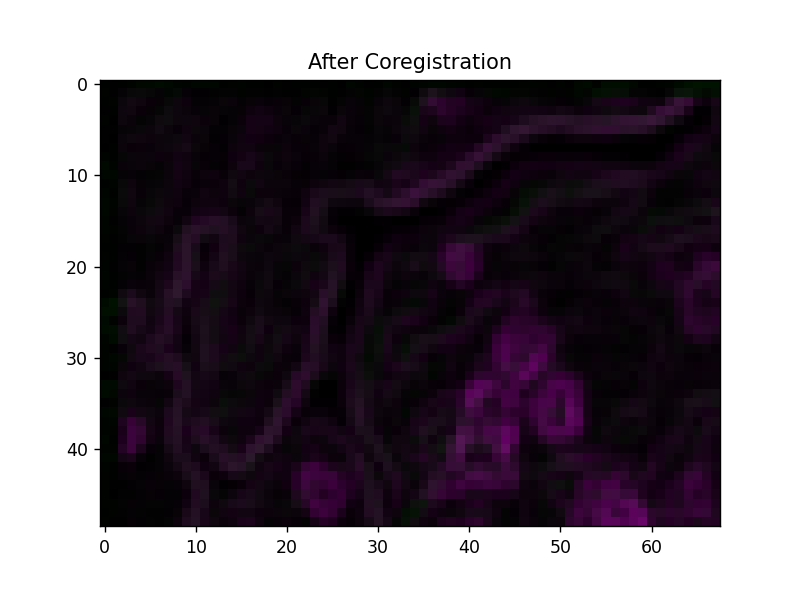

Text(0.5, 1.0, 'After Coregistration')

In [57]:
C = np.dstack((slave_im/0.5, master_im/1, slave_im/0.5))
pl.figure()
pl.imshow(C)
pl.title('Before Coregistration')

slaveRaff = slaveRecalee
D = np.dstack((slaveRaff/0.5, master_im/1, slaveRaff/0.5))
pl.figure()
pl.imshow(D)
pl.title('After Coregistration')

### 3.4. Apply flow computation to WQP map

Import the WQP map to apply the transformation

In [58]:
#Import the sample dataset
# in_path = './in/data/wqp/S3/wqp_no_clip/chl'
# file_name = 'S3B_CHL_IT_20200707T095909_L1.tif'
# src = wqp.wqp(os.path.join(in_path,file_name))
# src.readWQP()

It is necessary cropping the WQP map following the extent of the coregistered reference band

In [59]:
# src.cropRasterByFeatures(featureGeometry,'Nome')
# src.saveMaskedImage(os.path.join(in_path,'cropped',file_name+'.tif'),'wqp',band=1)

Read the cropped wqp map to apply the flow computation

In [60]:
# in_path = './in/data/wqp/S3/wqp/chl'
# file_name = 'S3B_CHL_IT_20200707T095909_L1.tif'
# src = wqp.wqp(os.path.join(in_path,'cropped',file_name+'.tif'))
# src.readWQP()

In [61]:
# wqp_map = src.image.read(1).astype(np.float32)

In [62]:
# wqp_map.shape

WPQ view

In [63]:
# # Data visualization of sample WQP
# f, axs = plt.subplots(1, 2, figsize=(15,6))

# #PLot WQP
# axs[0].imshow(src.image.read(1), cmap='viridis')
# axs[0].grid()
# axs[0].set_title('S3A_CHL_IT_20200102T094306_L1')

# #Histogram of values for the bands in the WQP map (single-band)
# axs[1] = show_hist(
#     src.image, bins=50, lw=0.0, stacked=False, alpha=0.3,
#     histtype='stepfilled', title="Histogram", label='CHL')

In [64]:
# wqp_map = imread(os.path.join(in_path,'cropped',file_name+'.tif'))
# wqp_map = wqp_map.astype(np.float32)
# QBrecalee = wrapData(wqp_map, u, v)

In [65]:
# #Import the sample dataset master - Reference coregistration band
# src_master = wqp.wqp(os.path.join(out_path_master,master.name+'_Oa_18.tif'))
# src_master.readWQP()
# # Save the coregistered WQP map
# src_master.writeWQP(os.path.join(cwd['out'],'Coregistration/wqp/S3/chl',src.name.split('\\')[-1]),QBrecalee)

In [66]:
# src.__dict__

### STATS coregistered vs initial

In [76]:
wqp_cor = wqp.wqp(os.path.join('out/Coregistration/wqp/S3/full/chl/',slave_name_wqp+'.tif'))
wqp_cor.readWQP()
wqp_cor.computeStatistics(gdf_lakes, 'Nome',"count min mean max median std  percentile_25 percentile_50 percentile_75",-9999)
df_temp = pd.DataFrame(wqp_cor.stats)
df = wqp.wqp.exportWQPFormatEstimates(wqp_cor)
# Export the statistics result to a file (append data if existing)
# out_file = os.path.join(cwd['out'],'lakesStats','lakesStats.csv')
# if os.path.exists(out_file):
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv'),mode='a', header=False)
# else:
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv')) 

In [77]:
os.path.join('out/Coregistration/wqp/S3/full/chl/',slave_name_wqp+'.tif')

'out/Coregistration/wqp/S3/full/chl/S3B_CHL_IT_20210422T100637_L1.tif'

In [78]:
np.nanmin(wqp_cor.image.read(1))

0.0059923646

In [79]:
wqp_cor.stats

{'Maggiore': {'min': 0.24634890258312225,
  'max': 9.625595092773438,
  'mean': 2.9199014846359965,
  'count': 1796,
  'std': 0.7300779199420572,
  'median': 2.961210250854492,
  'percentile_25': 2.628405451774597,
  'percentile_50': 2.9612101316452026,
  'percentile_75': 3.18900203704834},
 'Como': {'min': 0.20506882667541504,
  'max': 8.182379722595215,
  'mean': 3.893477081713094,
  'count': 884,
  'std': 1.3403745752077012,
  'median': 3.7587201595306396,
  'percentile_25': 3.200238287448883,
  'percentile_50': 3.7587201595306396,
  'percentile_75': 4.523011088371277},
 'Lugano': {'min': 0.12891776859760284,
  'max': 10.512080192565918,
  'mean': 4.644075324736446,
  'count': 249,
  'std': 2.1273564831774228,
  'median': 4.394730567932129,
  'percentile_25': 3.3093795776367188,
  'percentile_50': 4.394730567932129,
  'percentile_75': 6.180994510650635}}

In [80]:
wqp_original = wqp.wqp(os.path.join('in\data\wqp\S3\wqp_no_clip\chl',slave_name_wqp+'.tif'))
wqp_original.computeStatistics(gdf_lakes, 'Nome',"count min mean max median std  percentile_25 percentile_50 percentile_75",0)
df_temp = pd.DataFrame(wqp_original.stats)
df = wqp.wqp.exportWQPFormatEstimates(wqp_original)
# Export the statistics result to a file (append data if existing)
# out_file = os.path.join(cwd['out'],'lakesStats','lakesStats.csv')
# if os.path.exists(out_file):
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv'),mode='a', header=False)
# else:
#     df.to_csv(os.path.join(cwd['out'],'lakesStats','lakesStats.csv')) 
# df_temp

In [81]:
df

,name,path,sensor,typology,crs,date,min_Maggiore,max_Maggiore,mean_Maggiore,count_Maggiore,...,percentile_75_Como,min_Lugano,max_Lugano,mean_Lugano,count_Lugano,std_Lugano,median_Lugano,percentile_25_Lugano,percentile_50_Lugano,percentile_75_Lugano
0,S3B_CHL_IT_20210422T100637_L1,in\data\wqp\S3\wqp_no_clip\chl\S3B_CHL_IT_2021...,S3B,CHL,IT,2021-04-22 10:06:37,0.0,12.737815,2.57286,2133,...,4.438688,0.0,10.964051,2.557166,465,2.785006,1.689132,0.0,1.689132,4.344797


In [72]:
wqp_cor.name

'out/Coregistration/wqp/S3/full/chl/S3B_CHL_IT_20210422T100637_L1'

<p class="warning"><strong>Warning:</strong> Once finished working with an image remember to close the product</p>

In [73]:
# src.closeWQP()
# del src